---

# Projet 2 : Concevez une application au service de la santé publique

---

## To-do:

- Make PCA relevant?
- Better features correlations

# Table of contents

1. [Univariate analyses](#univariate_analyses)
    - [Countries](#countries)
    - [Product name](#product_name)
    - [Ingredients from palm oil](#ingredients_from_palm_oil)
    - [Ingredients maybe from palm oil](#ingredients_maybe_from_palm_oil)
    - [Creators](#creator)
    - [Nutrition grade](#nutrition_grade)
    - [Brands](#brands)
    - [Additives](#additives)
    - [_100g](#_100g)
    - [date_created](#date_created)
    - [last_modified](#last_modified)
2. [Bivariate analyses](#bivariate_analyses)
    - `Nutrition grade` vs `Country`
    - `energy_100g` vs `Country`
    - `fat_100g` vs `Country`
3. [Correlations between variables](#correlation)
4. [PCA](#PCA)

<a name='data_analysis'></a>
# Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.close("all")
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway

from platform import python_version
print('Python:', python_version())
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

Python: 3.8.8
matplotlib: 3.6.0


In [219]:
#!pip install matplotlib --upgrade --user
#!pip install dataframe_image

In [3]:
def aggregate(column_1, column_2, column_3):
    
    """
    Function to aggregate values of 3 series.
    
    INPUT: column_1 --series
           column_2 --series
           column_3 --series
    
    OUTPUT: agg --series
    """
    
    agg = pd.DataFrame(column_1.value_counts()).merge(column_2.value_counts(), how='outer', left_index=True, right_index=True)
    agg = agg.merge(column_3.value_counts(), how='outer', left_index=True, right_index=True)
    agg = agg.fillna(0)
    agg = (agg[agg.columns[0]] + agg[agg.columns[1]] + agg[agg.columns[2]]).sort_values(ascending=False)
    
    return agg

In [4]:
data = pd.read_csv('cleaned_data.csv',
                   sep=',',
                   parse_dates=['date_created', 'last_modified'],
                   low_memory=False)

In [5]:
print(data.info())
with pd.option_context('display.max_columns', None):
    display(data.head())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288941 entries, 0 to 288940
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   code                                     288941 non-null  object        
 1   url                                      288941 non-null  object        
 2   creator                                  288941 non-null  object        
 3   product_name                             288941 non-null  object        
 4   ingredients_from_palm_oil_n              288941 non-null  object        
 5   ingredients_that_may_be_from_palm_oil_n  288941 non-null  object        
 6   nutrition_grade_fr                       288941 non-null  object        
 7   energy_100g                              288941 non-null  float64       
 8   fat_100g                                 288941 non-null  float64       
 9   saturated-fat_100g        

,code,url,creator,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,date_created,last_modified,country_1,country_2,country_3,brand_1,brand_2,brand_3,additive_1,additive_2,additive_3,additive_4,additive_5,additive_6,additive_7,additive_8,additive_9,additive_10
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,farine de blé noir,not specified,not specified,not specified,992.0,4.90,1.69,20.00,5.42,5.00,0.58420,0.231,2016-09-17 09:17:46,2016-09-17 09:18:13,en:france,not specified,not specified,ferme-t-y-r-nao,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
1,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,peanuts,0.0,0.0,b,1941.0,17.86,0.00,60.71,17.86,17.86,0.63500,0.250,2017-03-09 14:32:37,2017-03-09 14:32:37,en:united-states,not specified,not specified,torn-glasser,not specified,not specified,peanuts,wheat-flour,flour,sugar,rice-flour,flour,tapioca-starch,starch,salt,leavening
2,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,organic salted nut mix,0.0,0.0,d,2540.0,57.14,5.36,17.86,3.57,17.86,1.22428,0.482,2017-03-09 10:35:31,2017-03-09 10:35:31,en:united-states,not specified,not specified,grizzlies,not specified,not specified,organic-hazelnuts,hazelnuts,organic-cashews,cashews,organic-walnuts-almonds,walnuts-almonds,almonds,organic-sunflower-oil,sunflower-oil,oil
3,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,organic polenta,0.0,0.0,not specified,1552.0,1.43,1.69,77.14,5.42,8.57,0.58420,0.231,2017-03-09 10:34:13,2017-03-09 10:34:13,en:united-states,not specified,not specified,bob-s-red-mill,not specified,not specified,organic-polenta,polenta,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
4,0000000016100,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,breadshop honey gone nuts granola,0.0,0.0,not specified,1933.0,18.27,1.92,63.46,11.54,13.46,0.58420,0.231,2017-03-09 10:34:11,2017-03-09 10:34:11,en:united-states,not specified,not specified,unfi,not specified,not specified,rolled-oats,oats,grape-concentrate,concentrate,expeller-pressed-canola-oil,pressed-canola-oil,canola-oil,oil,sunflower-seeds,seeds


(288941, 33)


<a name='univariate_analyses'></a>
# 1. Univariate Analyses

<a name='countries'></a>
## `Country`

In [24]:
countries_agg = pd.DataFrame(aggregate(data['country_1'], data['country_2'], data['country_3']))

In [28]:
countries_agg = countries_agg.rename(columns={0: 'country'})
countries_agg['percentage'] = countries_agg['country'] / len(data) * 100
countries_agg['percentage'] = countries_agg['percentage'].round(2)
display(countries_agg)

,country,percentage
not specified,572890.0,198.27
en:united-states,150958.0,52.25
en:france,91769.0,31.76
en:switzerland,15540.0,5.38
en:germany,8005.0,2.77
...,...,...
en:etats-unis,1.0,0.00
en:virgin-islands-of-the-united-states,1.0,0.00
en:rwanda,1.0,0.00
en:worldwide,1.0,0.00


Text(0.5, 1.0, 'Répartition des produits par pays')

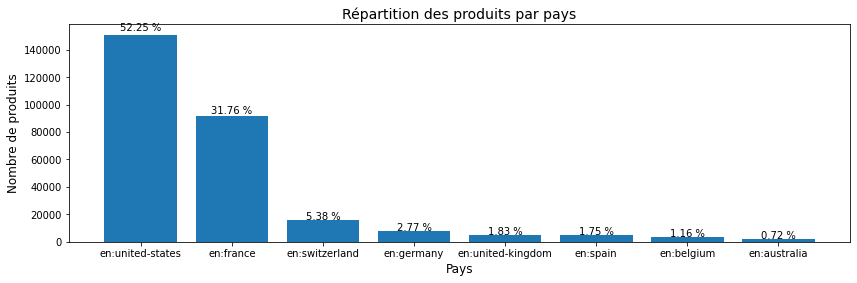

In [60]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(countries_agg.index[1:9], countries_agg['country'][1:9])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(countries_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Pays', size=12)
ax.set_ylabel('Nombre de produits', size=12)
ax.set_title('Répartition des produits par pays', size=14)

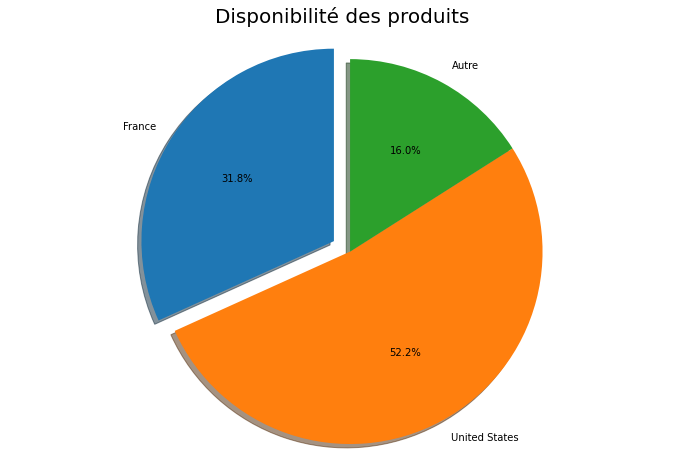

In [50]:
fig, ax = plt.subplots(figsize = (12,8))
ax.pie([countries_agg.loc[countries_agg.index == 'en:france', 'country'][0],
        countries_agg.loc[countries_agg.index == 'en:united-states', 'country'][0],
        len(data) - countries_agg.loc[countries_agg.index == 'en:france', 'country'][0] - countries_agg.loc[countries_agg.index == 'en:united-states', 'country'][0]],
       labels=['France', 'United States','Autre'],
       autopct='%1.1f%%',
       shadow=True,
       startangle=90,
       explode=(0.1, 0, 0))
ax.axis('equal')
ax.set_title('Disponibilité des produits', size=20)
plt.show()

#### Observations:

Most items in the database are available either in the US or in France, with only 16% available elsewhere.

<a name='product_name'></a>
## `Product name`

In [54]:
products_agg = pd.DataFrame(data['product_name'].value_counts())

In [55]:
products_agg = products_agg.rename(columns={0: 'product_name'})
products_agg['percentage'] = products_agg['product_name'] / len(data) * 100
products_agg['percentage'] = products_agg['percentage'].round(2)
display(products_agg)

,product_name,percentage
not specified,14290,4.95
unknown,2413,0.84
ice cream,417,0.14
potato chips,280,0.10
premium ice cream,225,0.08
...,...,...
butterscotch discs,1,0.00
soupe de l'océan,1,0.00
"mini-pretzel madness, chocolate",1,0.00
"happy snacks, animal crackers",1,0.00


Text(0.5, 1.0, 'Produits les plus listés')

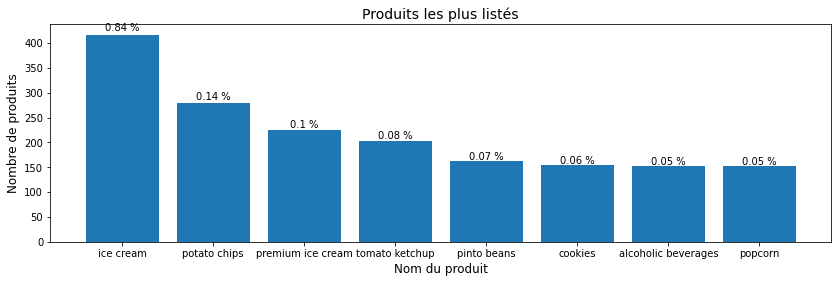

In [64]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(products_agg.index[2:10], products_agg['product_name'][2:10])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(products_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Nom du produit', size=12)
ax.set_ylabel('Nombre de produits', size=12)
ax.set_title('Produits les plus listés', size=14)

<a name='ingredients_from_palm_oil'></a>
## `Ingredients from palm oil`

In [69]:
ingredients_from_palm_oil = pd.DataFrame(data['ingredients_from_palm_oil_n'].value_counts().sort_index(ascending=True))

In [71]:
ingredients_from_palm_oil = ingredients_from_palm_oil.rename(index={'0.0': 'Aucun',
                                                                    '1.0': '1',
                                                                    '2.0': '2',
                                                                    'not specified': 'Non renseigné'})
display(ingredients_from_palm_oil)

,ingredients_from_palm_oil_n
Aucun,216001
1,4401
2,57
Non renseigné,68482


Text(0.5, 1.0, 'Number of ingredients from palm oil')

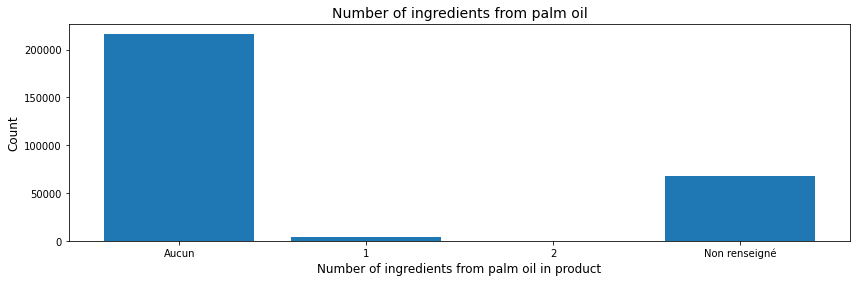

In [72]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(ingredients_from_palm_oil.index, ingredients_from_palm_oil['ingredients_from_palm_oil_n'].values)
ax.set_xlabel('Number of ingredients from palm oil in product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Number of ingredients from palm oil', size=14)

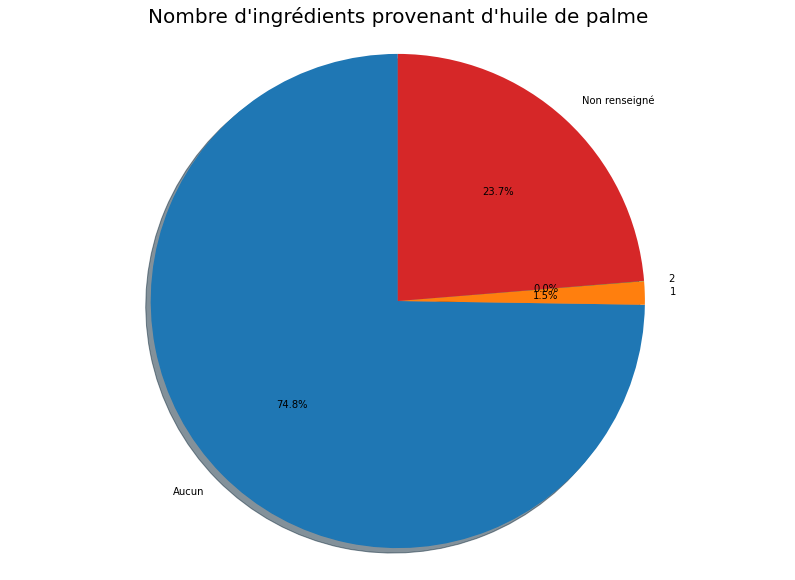

In [74]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(ingredients_from_palm_oil['ingredients_from_palm_oil_n'],
       labels=ingredients_from_palm_oil.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title("Nombre d'ingrédients provenant d'huile de palme", size=20)
plt.show()

<a name='ingredients_maybe_from_palm_oil'></a>
## `Ingredients maybe from palm oil`

In [78]:
ingredients_maybe_from_palm_oil = pd.DataFrame(data['ingredients_that_may_be_from_palm_oil_n'].value_counts().sort_index(ascending=True))

In [81]:
ingredients_maybe_from_palm_oil = ingredients_maybe_from_palm_oil.rename(index={'0.0': 'Aucun',
                                                                                '1.0': '1',
                                                                                '2.0': '2',
                                                                                '3.0': '3',
                                                                                '4.0': '4',
                                                                                '5.0': '5',
                                                                                '6.0': '6',
                                                                                'not specified': 'Non renseigné'})
display(ingredients_maybe_from_palm_oil)

,ingredients_that_may_be_from_palm_oil_n
Aucun,209493
1,9391
2,1259
3,265
4,45
5,5
6,1
Non renseigné,68482


Text(0.5, 1.0, 'Number of ingredients that may be from palm oil')

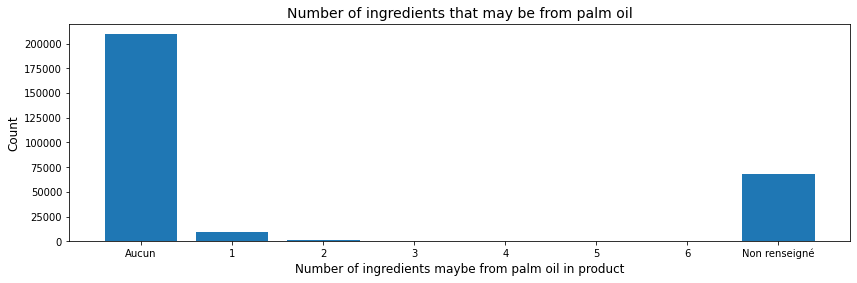

In [83]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(ingredients_maybe_from_palm_oil.index, ingredients_maybe_from_palm_oil['ingredients_that_may_be_from_palm_oil_n'])
ax.set_xlabel('Number of ingredients maybe from palm oil in product', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Number of ingredients that may be from palm oil', size=14)

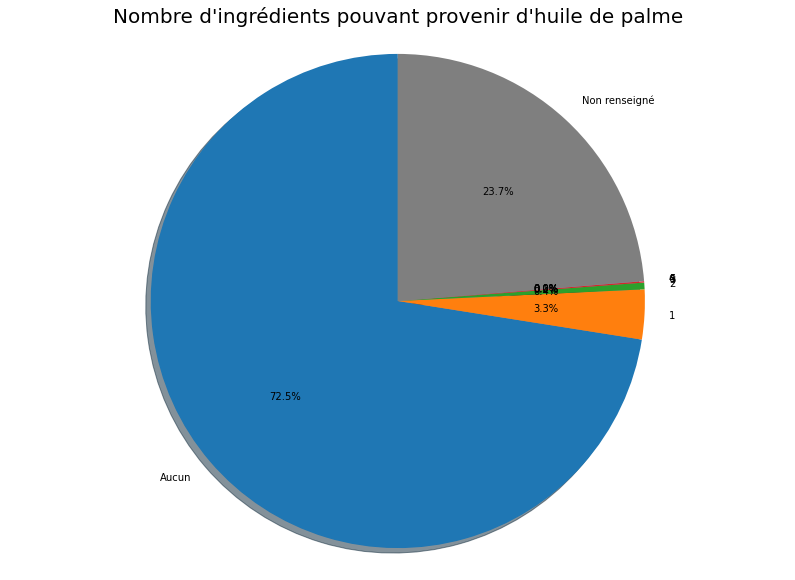

In [86]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(ingredients_maybe_from_palm_oil['ingredients_that_may_be_from_palm_oil_n'],
       labels=ingredients_maybe_from_palm_oil.index,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90)
ax.axis('equal')
ax.set_title("Nombre d'ingrédients pouvant provenir d'huile de palme", size=20)
plt.show()

<a name='creator'></a>
## `Creator`

### Contribution by creators

In [89]:
creators_agg = pd.DataFrame(data['creator'].value_counts())

In [91]:
creators_agg = creators_agg.rename(columns={0: 'creator'})
creators_agg['percentage'] = creators_agg['creator'] / len(data) * 100
creators_agg['percentage'] = creators_agg['percentage'].round(2)
display(creators_agg)

,creator,percentage
usda-ndb-import,147638,51.10
openfoodfacts-contributors,38234,13.23
kiliweb,12109,4.19
date-limite-app,11647,4.03
openfood-ch-import,10483,3.63
...,...,...
hanvina,1,0.00
sarahlzn,1,0.00
tiotom,1,0.00
lgo,1,0.00


Text(0.5, 1.0, 'Contribution des plus gros créateurs')

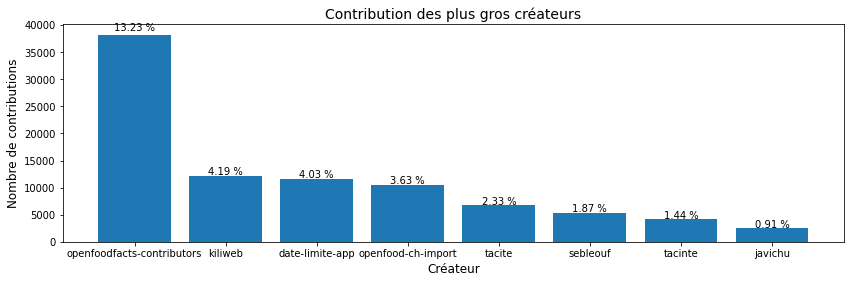

In [94]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(creators_agg.index[1:9], creators_agg['creator'][1:9])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(creators_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Créateur', size=12)
ax.set_ylabel('Nombre de contributions', size=12)
ax.set_title('Contribution des plus gros créateurs', size=14)

<a name='nutrition_grade'></a>
## `Nutrition grade`

### Nutrition grade repartition

In [98]:
nutrition_grade_agg = pd.DataFrame(data['nutrition_grade_fr'].value_counts().sort_index(ascending=True))

In [101]:
nutrition_grade_agg = nutrition_grade_agg.rename(index={'not specified': 'Non renseigné'})

Text(0.5, 1.0, 'Nutrition grade repartition')

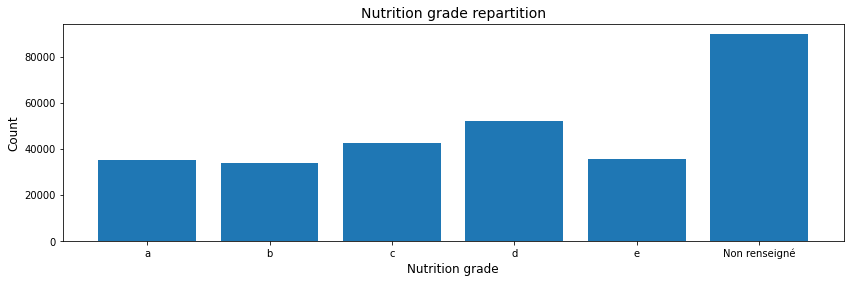

In [102]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(nutrition_grade_agg.index, nutrition_grade_agg['nutrition_grade_fr'])
ax.set_xlabel('Nutrition grade', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title('Nutrition grade repartition', size=14)

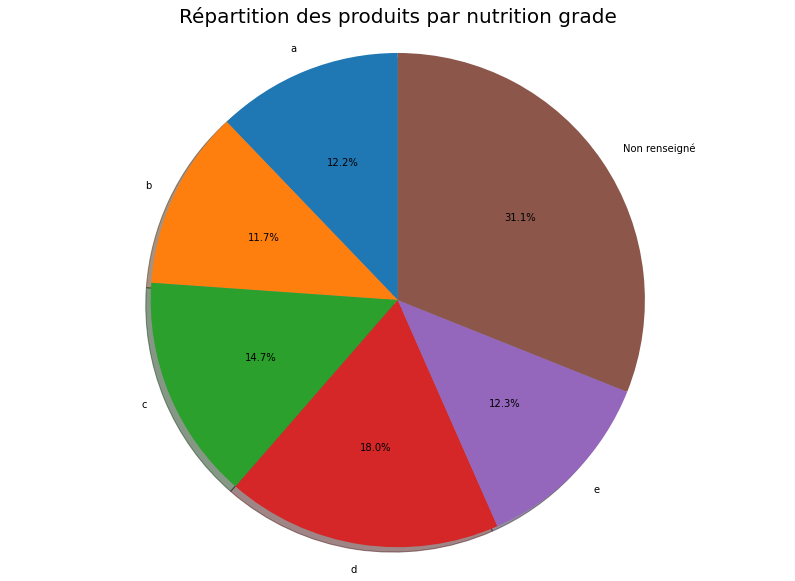

In [104]:
fig, ax = plt.subplots(figsize = (14,10))
ax.pie(nutrition_grade_agg['nutrition_grade_fr'], labels=nutrition_grade_agg.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Répartition des produits par nutrition grade', size=20)
plt.show()

#### Observations:

There is a relatively equal split between the different nutrition grades.

<a name='brands'></a>
## `Brand`

In [108]:
brands_agg = pd.DataFrame(aggregate(data['brand_1'], data['brand_2'], data['brand_3']))

In [110]:
brands_agg = brands_agg.rename(columns={0: 'brand'})

Text(0.5, 1.0, 'Répartition des marques les plus renseignées')

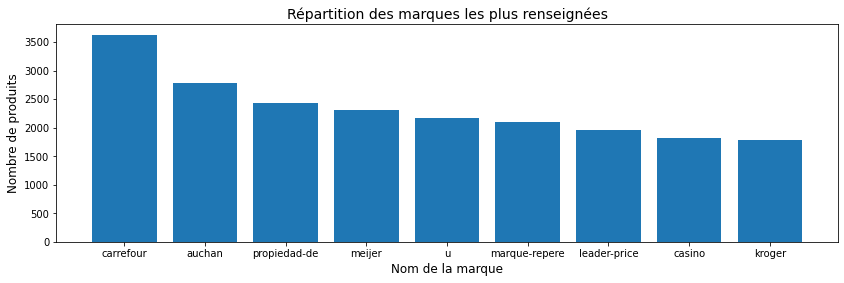

In [113]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(brands_agg.index[1:10], brands_agg['brand'][1:10])
ax.set_xlabel('Nom de la marque', size=12)
ax.set_ylabel('Nombre de produits', size=12)
ax.set_title('Répartition des marques les plus renseignées', size=14)

<a name='additives'></a>
## `Additive`

In [114]:
additives_agg = pd.DataFrame(data['additive_1'].value_counts()).merge(data['additive_2'].value_counts(),
                                                                      how='outer',
                                                                      left_index=True,
                                                                      right_index=True)
additives_agg = additives_agg.merge(data['additive_3'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_4'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_5'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_6'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_7'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_8'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_9'].value_counts(), how='outer', left_index=True, right_index=True)
additives_agg = additives_agg.merge(data['additive_10'].value_counts(), how='outer', left_index=True, right_index=True)

additives_agg = additives_agg.fillna(0)
additives_agg = (additives_agg[additives_agg.columns[0]]
                 + additives_agg[additives_agg.columns[1]]
                 + additives_agg[additives_agg.columns[2]]
                 + additives_agg[additives_agg.columns[3]]
                 + additives_agg[additives_agg.columns[4]]
                 + additives_agg[additives_agg.columns[5]]
                 + additives_agg[additives_agg.columns[6]]
                 + additives_agg[additives_agg.columns[7]]
                 + additives_agg[additives_agg.columns[8]]
                 + additives_agg[additives_agg.columns[9]]).sort_values(ascending=False)

In [123]:
additives_agg = pd.DataFrame(additives_agg)
additives_agg = additives_agg.rename(columns={0: 'additive'})
additives_agg['percentage'] = additives_agg['additive'] / len(data) * 100
additives_agg['percentage'] = additives_agg['percentage'].round(2)

In [124]:
additives_agg

,additive,percentage
not specified,950840.0,329.08
water,55689.0,19.27
flour,47806.0,16.55
sugar,47637.0,16.49
salt,32426.0,11.22
...,...,...
iron-riboflavin,1.0,0.00
arome-naturel-citron-vert-1,1.0,0.00
iron-phosphate-niacin-thiamine-mononitrate-folic-acid,1.0,0.00
arome-naturel-citron-vert-1-2,1.0,0.00


Text(0.5, 1.0, "Répartition de la présence d'additifs dans les produits")

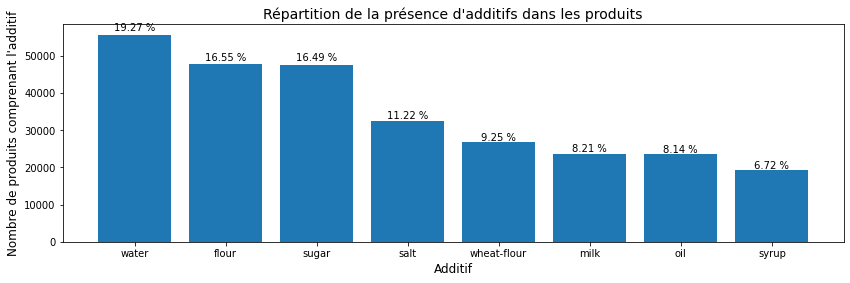

In [129]:
fig, ax = plt.subplots(figsize = (14,4))
graph = ax.bar(additives_agg.index[1:9], additives_agg['additive'][1:9])

i = 1
for rect in graph:
    width = rect.get_width()
    height = rect.get_height()
    x, y = rect.get_xy()
    plt.text(x+width/2,
             y+height*1.02,
             str(additives_agg['percentage'][i])+' %',
             ha='center',
             #weight='bold',
            )
    i += 1

ax.set_xlabel('Additif', size=12)
ax.set_ylabel("Nombre de produits comprenant l'additif", size=12)
ax.set_title("Répartition de la présence d'additifs dans les produits", size=14)

<a name='_100g'></a>
## *Per 100g* components

In [131]:
num_cols = data.select_dtypes(include=np.number).columns.tolist()
cols_100g = num_cols.copy()
cols_100g.remove('energy_100g')
print(cols_100g)

['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']


### Boxplots

<AxesSubplot: >

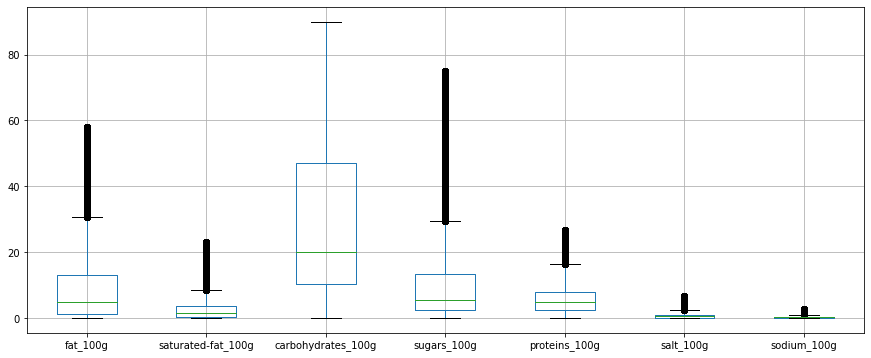

In [132]:
plt.figure(figsize=(15,6))
data.boxplot(column=cols_100g)

## `energy_100g`

<AxesSubplot: >

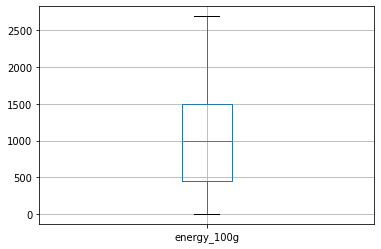

In [136]:
data.boxplot(column="energy_100g")

(array([ 8474.,  8346., 26590., 25544., 22040., 21583., 87196., 42287.,
        31032., 15849.]),
 array([ 0.        ,  5.18652099, 10.37304198, 15.55956298, 20.74608397,
        25.93260496, 31.11912595, 36.30564694, 41.49216794, 46.67868893,
        51.86520992]),
 <BarContainer object of 10 artists>)

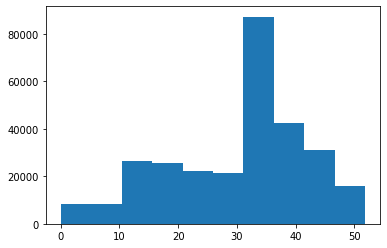

In [133]:
plt.hist(np.sqrt(data['energy_100g']), bins=10)

<a name='date_created'></a>
## `Date created`

Text(0.5, 1.0, 'Date de création des produits')

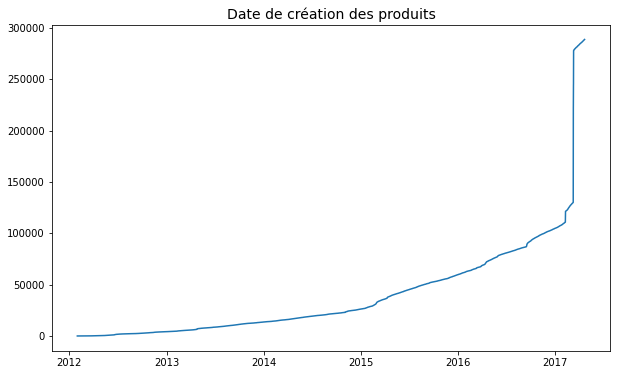

In [142]:
plt.figure(figsize=(10,6))
plt.plot(data['date_created'].sort_values(ascending=True), range(len(data)), '-')
plt.title('Date de création des produits', size=14)

#### Observations:

We can see that items are added steadily over time, with a huge spike of added items in 2017.

<a name='last_modified'></a>
## `Last modified`

Text(0.5, 1.0, 'Date de dernière modification des produits (trié par date de création)')

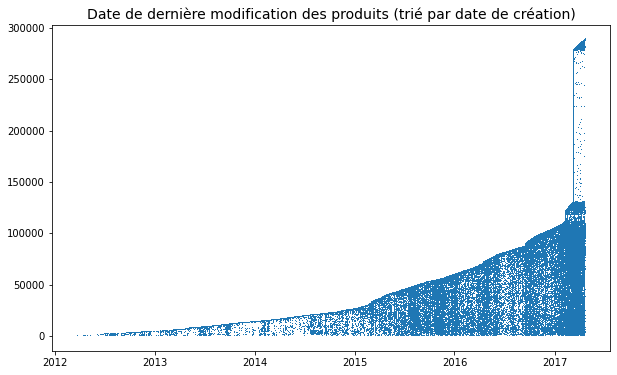

In [145]:
plt.figure(figsize=(10,6))
plt.plot(data.sort_values(by='date_created', ascending=True)['last_modified'], range(len(data)), ',')
plt.title('Date de dernière modification des produits (trié par date de création)', size=14)

#### Observations:

This shows us that even items created a long time ago keep getting modified.

<a name='bivariate_analyses'></a>
# 2. Bivariate analyses

## `Nutrition grade` vs `Country`

In [146]:
grade_agg_fr = data[(data['country_1'] == 'en:france')
                    | (data['country_2'] == 'en:france')
                    | (data['country_3'] == 'en:france')]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)
grade_agg_us = data[(data['country_1'] == 'en:united-states')
                    | (data['country_2'] == 'en:united-states')
                    | (data['country_3'] == 'en:united-states')]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)
grade_agg_other = data[(data['country_1'] != 'en:france')
                       & (data['country_1'] != 'en:united-states')
                       & (data['country_2'] != 'en:france')
                       & (data['country_2'] != 'en:united-states')
                       & (data['country_3'] != 'en:france')
                       & (data['country_3'] != 'en:united-states')
                      ]['nutrition_grade_fr'].value_counts().sort_index(ascending=True)

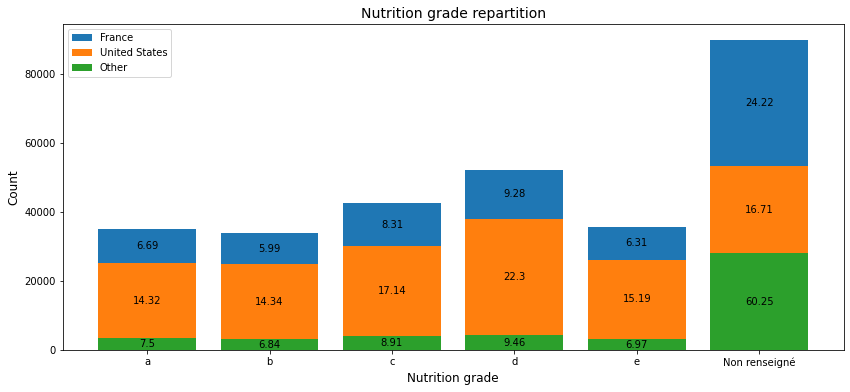

In [198]:
fig, ax = plt.subplots(figsize = (14,6))

fr = ax.bar(nutrition_grade_agg.index, grade_agg_fr.values, bottom=grade_agg_us.values + grade_agg_other.values, label='France')
us = ax.bar(nutrition_grade_agg.index, grade_agg_us.values, bottom=grade_agg_other.values, label='United States')
other = ax.bar(nutrition_grade_agg.index, grade_agg_other.values, label='Other')

ax.set_xlabel('Nutrition grade', size=12)
ax.set_ylabel('Count', size=12)
ax.legend()
ax.set_title('Nutrition grade repartition', size=14)
ax.bar_label(fr,
             labels=np.round(grade_agg_fr.values / len(data[(data['country_1'] == 'en:united-states')
                                                            | (data['country_2'] == 'en:united-states')
                                                            | (data['country_3'] == 'en:united-states')]) * 100, 2).astype('str'),
             label_type='center')
ax.bar_label(us,
             labels=np.round(grade_agg_us.values / len(data[(data['country_1'] == 'en:united-states')
                                                            | (data['country_2'] == 'en:united-states')
                                                            | (data['country_3'] == 'en:united-states')]) * 100, 2).astype('str'),
             label_type='center')
ax.bar_label(other,
             labels=np.round(grade_agg_other.values / len(data[(data['country_1'] != 'en:france')
                                                               & (data['country_1'] != 'en:united-states')
                                                               & (data['country_2'] != 'en:france')
                                                               & (data['country_2'] != 'en:united-states')
                                                               & (data['country_3'] != 'en:united-states')]) * 100, 2).astype('str'),
             label_type='center')

plt.show()

## `energy_100g` vs `Country`

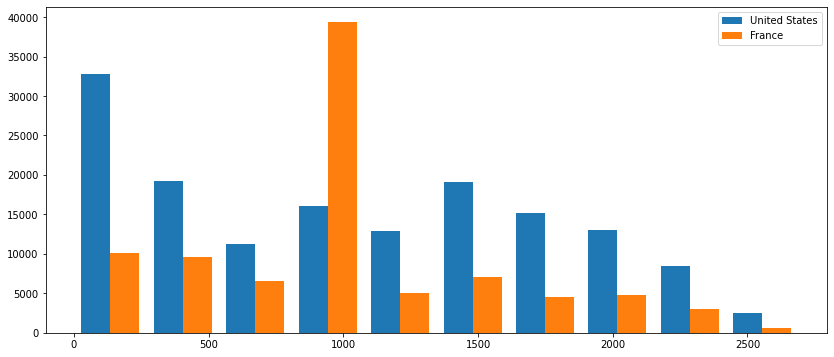

In [199]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['country_1'] == 'en:united-states']['energy_100g'],
          data[data['country_1'] == 'en:france']['energy_100g']], bins=10, label=['United States', 'France'])
ax.legend()
plt.show()

## `fat_100g` vs `Country`

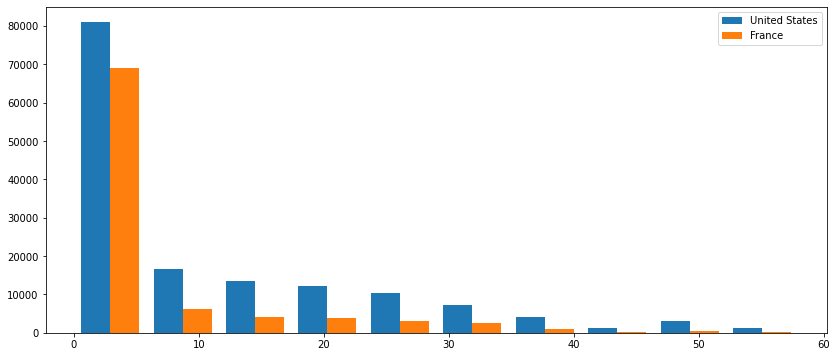

In [200]:
fig, ax = plt.subplots(figsize = (14,6))
plt.hist([data[data['country_1'] == 'en:united-states']['fat_100g'],
          data[data['country_1'] == 'en:france']['fat_100g']], bins=10, label=['United States', 'France'])
ax.legend()
plt.show()

<a name='correlation'></a>
# 3. Correlations

## Correlation matrix

- Pearson: linear relationships
- Spearmon: monotonic relationships

In [214]:
corrMatrix = data.corr(method='spearman')

In [310]:
corrMatrix.style.applymap(lambda x: 'background-color : lightgreen' if (x >= 0.65) & (x < 0.9)
                          else 'background-color : green' if (x >= 0.9) & (x != 1)
                          else '')
#corrMatrix.export('corrMatrix.png')

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.689586,0.536699,0.678074,0.284490,0.524271,0.215135,0.214941
fat_100g,0.689586,1.000000,0.764492,0.216467,0.044966,0.506197,0.377444,0.377258
saturated-fat_100g,0.536699,0.764492,1.000000,0.098153,0.128336,0.331357,0.233353,0.233203
carbohydrates_100g,0.678074,0.216467,0.098153,1.000000,0.505356,0.169942,-0.042687,-0.043012
sugars_100g,0.284490,0.044966,0.128336,0.505356,1.000000,-0.248996,-0.274733,-0.275101
proteins_100g,0.524271,0.506197,0.331357,0.169942,-0.248996,1.000000,0.358487,0.358353
salt_100g,0.215135,0.377444,0.233353,-0.042687,-0.274733,0.358487,1.000000,0.999730
sodium_100g,0.214941,0.377258,0.233203,-0.043012,-0.275101,0.358353,0.999730,1.000000


#### Observations:

`sodium_100g` super correlated with `salt_100g`, which is logical since salt is basically sodium.

## Correlation heatmap

<AxesSubplot: >

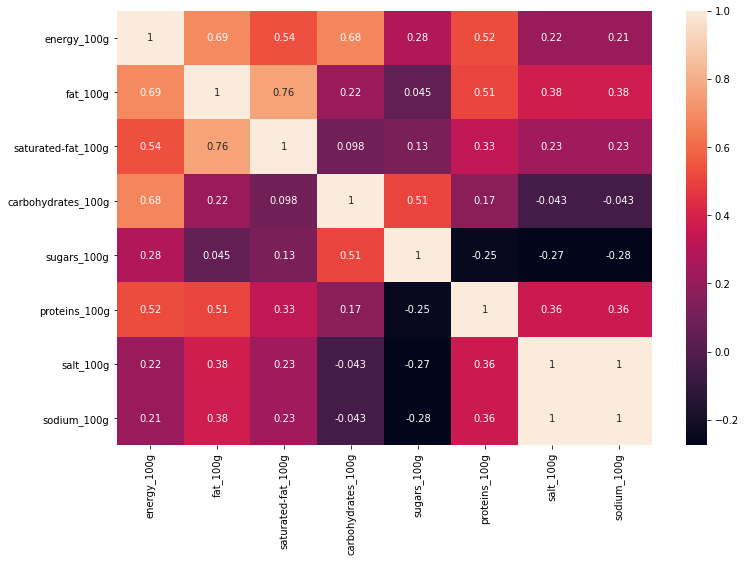

In [228]:
plt.figure(figsize=(12,8))
sns.heatmap(corrMatrix, annot=True)

## Salt vs Sodium - 1

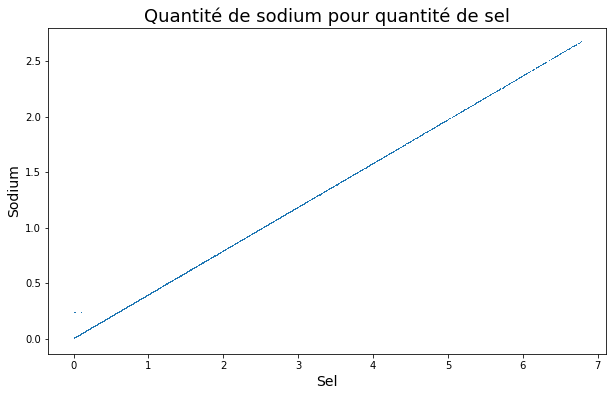

In [252]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['salt_100g'], data['sodium_100g'], ',')
ax.set_xlabel('Sel', size=14)
ax.set_ylabel("Sodium", size=14)
plt.title('Quantité de sodium pour quantité de sel', size=18)
plt.show()

In [241]:
data[['product_name', 'sodium_100g']].sort_values(by='sodium_100g', ascending=False).head(10)

,product_name,sodium_100g
12280,italian panko breadcrumbs,2.667
45107,10 min. marinade steakhouse,2.667
68474,"blue cheese jalapeno seasoning blend, spicy",2.667
130120,premium seasoning jerky,2.667
84312,chili sauce,2.667
45083,"redhot, hot buffalo wings sauce",2.667
109709,non-pareil capers,2.667
51315,organic chili powder,2.667
16720,italian garlic steak marinade,2.667
111458,barbeque sauce,2.667


In [242]:
data[['product_name', 'salt_100g']].sort_values(by='salt_100g', ascending=False).head(10)

,product_name,salt_100g
68474,"blue cheese jalapeno seasoning blend, spicy",6.77418
45083,"redhot, hot buffalo wings sauce",6.77418
19289,"calhoun bend mill, awesome onion coating mix",6.77418
137809,"da-works, brat sauce, signature sauce",6.77418
87912,organic chili powder,6.77418
137243,"marketplace, organic chili powder with salt",6.77418
109709,non-pareil capers,6.77418
84312,chili sauce,6.77418
284763,corn cream soup powder,6.77418
111458,barbeque sauce,6.77418


## Energy vs Fat - 0.69

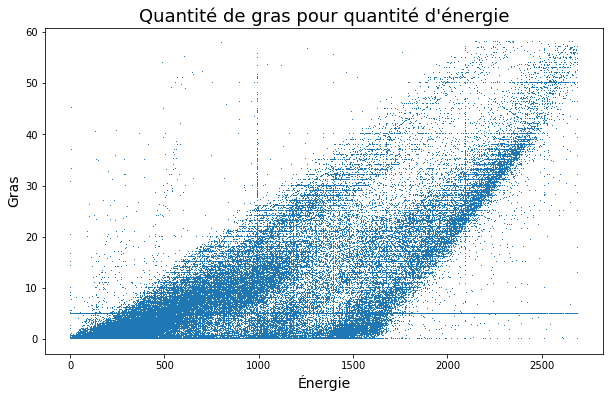

In [262]:
# rajouter grade en couleur # rajouter grade en couleur # rajouter grade en couleur # rajouter grade en couleur 

fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['energy_100g'], data['fat_100g'], ',')
ax.set_xlabel('Énergie', size=14)
ax.set_ylabel("Gras", size=14)
plt.title("Quantité de gras pour quantité d'énergie", size=18)
plt.show()

## Energy vs Salt 0.22

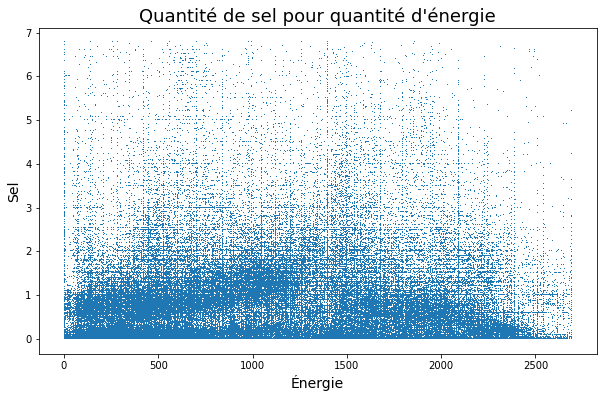

In [263]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(data['energy_100g'], data['salt_100g'], ',')
ax.set_xlabel('Énergie', size=14)
ax.set_ylabel("Sel", size=14)
plt.title("Quantité de sel pour quantité d'énergie", size=18)
plt.show()

## Saturated_fat vs carbohydrates - 0.1

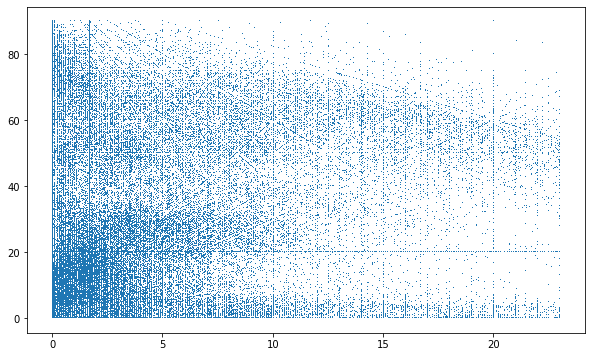

In [260]:
plt.figure(figsize=(10,6))
plt.plot(data['saturated-fat_100g'], data['carbohydrates_100g'], ',')

<a name='anova'></a>

## Implication of `energy_100g` on `nutrition_grade`

In [264]:
data2 = data[['nutrition_grade_fr', 'energy_100g']]
data2['energy_100g'] = np.sqrt(data2['energy_100g'])

<ipython-input-264-b4e75897df00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['energy_100g'] = np.sqrt(data2['energy_100g'])


In [265]:
lists = data2[['nutrition_grade_fr', 'energy_100g']].groupby('nutrition_grade_fr')['energy_100g'].apply(list)

In [266]:
lists = lists.drop('not specified')

<AxesSubplot: >

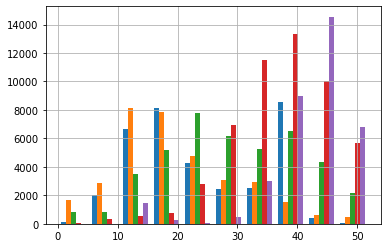

In [267]:
lists.hist()

In [268]:
np.std(lists['a'])

10.644375141914406

In [269]:
np.std(lists['b'])

10.137385741685728

In [270]:
np.std(lists['c'])

11.185367271762185

In [271]:
np.std(lists['d'])

8.101094003877892

In [272]:
np.std(lists['e'])

7.674742806497978

In [273]:
AnovaResults = f_oneway(*lists)

In [274]:
AnovaResults

F_onewayResult(statistic=30469.570074273885, pvalue=0.0)

## Correlation between `energy_100g` and `fat_100g`

In [275]:
AnovaResults2 = f_oneway(data['energy_100g'], data['fat_100g'])

In [276]:
AnovaResults2

F_onewayResult(statistic=711507.88122836, pvalue=0.0)

<a name='PCA'></a>
# 4. PCA

In [277]:
quantitative_features = data.select_dtypes(include=np.number).columns.tolist()
X = data[quantitative_features]

In [278]:
quantitative_features

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [279]:
scaler = StandardScaler()

In [280]:
scaler.fit(X)

StandardScaler()

In [281]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.04898249, -0.38282499, -0.36783175, -0.34004181, -0.41343007,
        -0.22590593, -0.24231848, -0.24032294],
       [ 1.41930435,  0.75509156, -0.71250598,  1.3487504 ,  0.36944568,
         1.93415816, -0.18708699, -0.18784217],
       [ 2.34607339,  4.20396209,  0.38066199, -0.42881644, -0.52985452,
         1.93415816,  0.45359828,  0.45297558],
       [ 0.81744599, -0.68749864, -0.36783175,  2.03032388, -0.41343007,
         0.37373861, -0.24231848, -0.24032294],
       [ 1.4069268 ,  0.79109046, -0.32092342,  1.46282996, -0.02828541,
         1.19510047, -0.24231848, -0.24032294]])

In [282]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [283]:
n_components = 6

In [284]:
pca = PCA(n_components=n_components)

In [285]:
pca.fit(X_scaled)

PCA(n_components=6)

In [286]:
pca.explained_variance_ratio_

array([0.37847488, 0.27845256, 0.15555927, 0.09536713, 0.05043913,
       0.0310144 ])

In [287]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([37.85, 27.85, 15.56,  9.54,  5.04,  3.1 ])

In [288]:
scree_cum = scree.cumsum().round()
scree_cum

array([38., 66., 81., 91., 96., 99.])

In [289]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

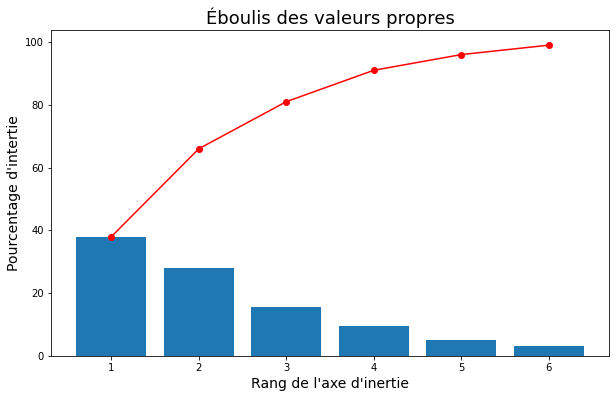

In [303]:
plt.figure(figsize=(10,6))
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("Rang de l'axe d'inertie", size=14)
plt.ylabel("Pourcentage d'intertie", size=14)
plt.title("Éboulis des valeurs propres", size=18)
plt.show()

In [291]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.503674,0.478493,0.422723,0.255964,0.174509,0.321082,0.264263,0.264129
1,-0.220585,-0.016064,-0.083053,-0.386417,-0.475231,0.198933,0.514450,0.514577
2,0.023703,-0.316813,-0.323799,0.479150,0.361418,-0.359540,0.390377,0.390322
3,0.210579,-0.206857,-0.493923,0.388166,-0.279947,0.645942,-0.106391,-0.106312
4,-0.322270,-0.423275,0.272277,-0.169246,0.566705,0.538317,0.040576,0.040187
5,-0.027366,-0.483412,0.625358,0.388976,-0.460603,-0.104185,-0.009473,-0.009427


In [292]:
pcs.columns = quantitative_features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.50,0.48,0.42,0.26,0.17,0.32,0.26,0.26
F2,-0.22,-0.02,-0.08,-0.39,-0.48,0.20,0.51,0.51
F3,0.02,-0.32,-0.32,0.48,0.36,-0.36,0.39,0.39
F4,0.21,-0.21,-0.49,0.39,-0.28,0.65,-0.11,-0.11
F5,-0.32,-0.42,0.27,-0.17,0.57,0.54,0.04,0.04
F6,-0.03,-0.48,0.63,0.39,-0.46,-0.10,-0.01,-0.01


In [293]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.503674,-0.220585,0.023703,0.210579,-0.322270,-0.027366
fat_100g,0.478493,-0.016064,-0.316813,-0.206857,-0.423275,-0.483412
saturated-fat_100g,0.422723,-0.083053,-0.323799,-0.493923,0.272277,0.625358
carbohydrates_100g,0.255964,-0.386417,0.479150,0.388166,-0.169246,0.388976
sugars_100g,0.174509,-0.475231,0.361418,-0.279947,0.566705,-0.460603
proteins_100g,0.321082,0.198933,-0.359540,0.645942,0.538317,-0.104185
salt_100g,0.264263,0.514450,0.390377,-0.106391,0.040576,-0.009473
sodium_100g,0.264129,0.514577,0.390322,-0.106312,0.040187,-0.009427


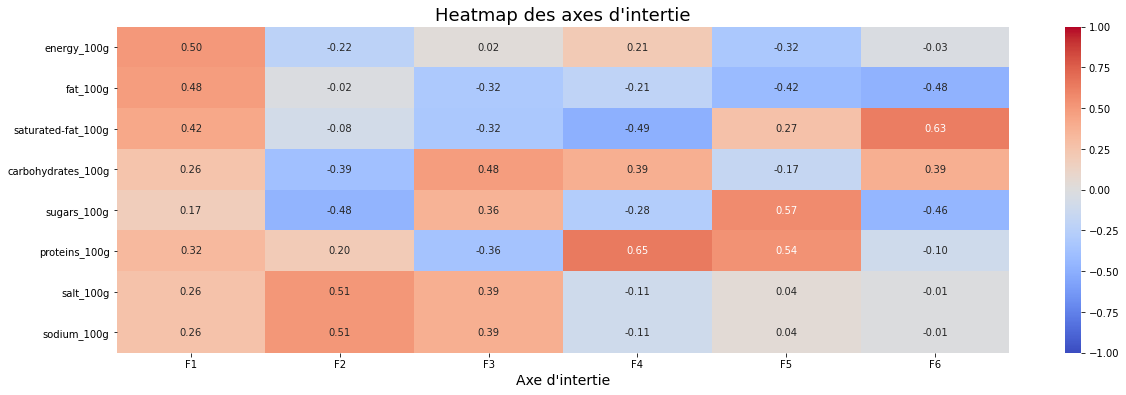

In [307]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.xlabel("Axe d'intertie", size=14)
ax.set_title("Heatmap des axes d'intertie", size=18)
plt.show()

In [295]:
x, y = 0,1

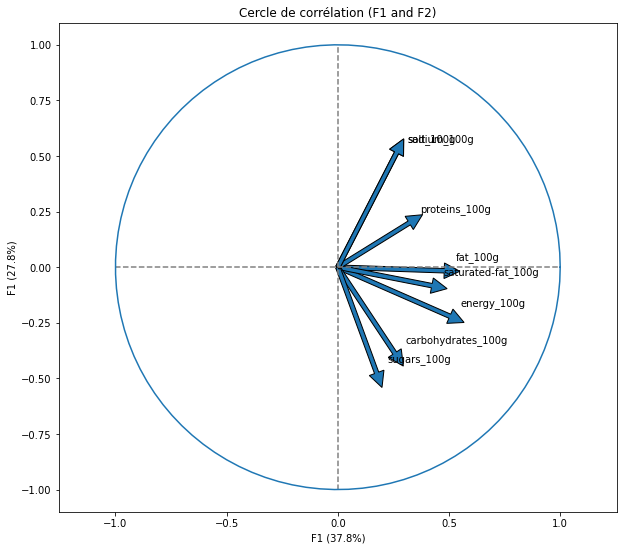

In [308]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             quantitative_features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle de corrélation (F{} and F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

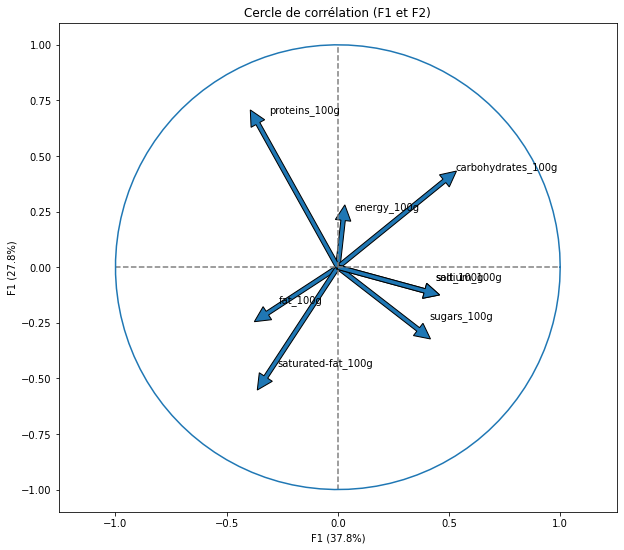

In [309]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[2, i],  #0 for PC1
             pca.components_[3, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[2, i] + 0.05,
             pca.components_[3, i] + 0.05,
             quantitative_features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle de corrélation (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

# Application

## Mode écologie

If palm_oil:

    Find product with same product_name without palm_oil
    
If maybe_palm_oil:

    Find product with same product_name without maybe_palm_oil
    
## Mode santé

If nutrition_grade != a:

    Fine product with same product_name == a or b or c or d

OR same for additives:

    Find products with less unwanted additives (ex: fat)
    


In [298]:
data[data['product_name'] == 'farine']

,code,url,creator,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,...,additive_1,additive_2,additive_3,additive_4,additive_5,additive_6,additive_7,additive_8,additive_9,additive_10
57512,0055200000220,http://world-fr.openfoodfacts.org/produit/0055...,date-limite-app,farine,not specified,not specified,not specified,992.0,4.9,1.69,...,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
101109,0358441782642,http://world-fr.openfoodfacts.org/produit/0358...,nioff,farine,not specified,not specified,not specified,992.0,4.9,1.69,...,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
154137,2000000034262,http://world-fr.openfoodfacts.org/produit/2000...,agamitsudo,farine,0.0,0.0,not specified,992.0,4.9,1.69,...,100-ble,100,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
211340,3554983000337,http://world-fr.openfoodfacts.org/produit/3554...,openfoodfacts-contributors,farine,not specified,not specified,not specified,992.0,4.9,1.69,...,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
226886,3760150041977,http://world-fr.openfoodfacts.org/produit/3760...,jibec,farine,not specified,not specified,not specified,992.0,4.9,1.69,...,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
254280,6132500320013,http://world-fr.openfoodfacts.org/produit/6132...,openfoodfacts-contributors,farine,not specified,not specified,not specified,992.0,4.9,1.69,...,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified


In [299]:
data[data['product_name'] == 'peanut']

,code,url,creator,product_name,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,...,additive_1,additive_2,additive_3,additive_4,additive_5,additive_6,additive_7,additive_8,additive_9,additive_10
52673,0049022764330,http://world-fr.openfoodfacts.org/produit/0049...,usda-ndb-import,peanut,0.0,0.0,d,2531.0,46.51,6.98,...,peanuts,nut-coater,coater,sugar,modified-corn-starch,corn-starch,starch,honey-glaze,glaze,honey-powder
80268,0076500061803,http://world-fr.openfoodfacts.org/produit/0076...,usda-ndb-import,peanut,0.0,0.0,d,1941.0,25.00,3.57,...,peanuts,corn-syrup,syrup,sugar,baking-soda,soda,natural-flavor,flavor,sea-salt,salt
87118,0079113461169,http://world-fr.openfoodfacts.org/produit/0079...,usda-ndb-import,peanut,0.0,0.0,e,2197.0,37.50,17.50,...,chocolate-covered-peanuts,covered-peanuts,peanuts,peanuts,sugar,partially-hydrogenated-palm-kernel-oil,hydrogenated-palm-kernel-oil,palm-kernel-oil,kernel-oil,oil
126743,0780562880363,http://world-fr.openfoodfacts.org/produit/0780...,usda-ndb-import,peanut,0.0,0.0,d,2092.0,21.43,3.57,...,peanuts,wheat-flour,flour,rice-flour,flour,sugar,cajun-devil-seasoning,devil-seasoning,seasoning,chilli-powder
126744,0780562880387,http://world-fr.openfoodfacts.org/produit/0780...,usda-ndb-import,peanut,0.0,0.0,d,2092.0,26.67,3.33,...,peanuts,sugar,butter,cream-and-salt,and-salt,salt,and-salt,salt,not specified,not specified
241562,5000159492966,http://world-fr.openfoodfacts.org/produit/5000...,openfoodfacts-contributors,peanut,not specified,not specified,not specified,992.0,4.90,1.69,...,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified,not specified
